In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

In [7]:
data = pd.read_excel(r'../data/Datos Codificados Estudio v2a.xlsx')
nlp = spacy.load('es_core_news_sm')

<BarContainer object of 28 artists>

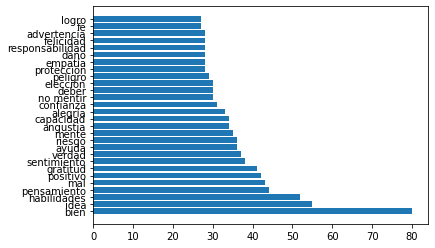

In [34]:
cod = data['Codificación'].value_counts()
reduce_cod = cod[cod>25]

names = list(reduce_cod.keys())
values = list(reduce_cod)

plt.barh(names, values)

In [42]:
print("Cantidad de codificaciones existente", cod.shape[0])

Cantidad de codificaciones existente 1296


In [41]:
print("Porcentaje de datos que solo tienen una codificación:",np.sum(cod == 1)/cod.shape[0])

Porcentaje de datos que solo tienen una codificación: 0.5169753086419753


¿Afecta esto en los resultados que se pueden obtener?
¿Podria intentar identificarlos?


In [16]:
descriptions = data['Descripción'].copy()

number_words = np.zeros(len(descriptions))

i=0
for d in descriptions:
    number_words[i]= len(nlp(d))
    i+=1

In [33]:
uniques_words = []

for d in descriptions:
    doc = nlp(d)
    for w in doc:
        if w.orth_ not in uniques_words:
            uniques_words.append(w.orth_)

In [36]:
print("min:", number_words.min())
print("max:", number_words.max())
print("mean:", number_words.mean())
print("std:", number_words.std())
print("\n\nTotal de palabras", number_words.sum())
print("De las cuales se tienen", len(uniques_words), "palabras únicas")

min: 1.0
max: 21.0
mean: 4.12636695018226
std: 3.1340106067803215


Total de palabras 20376.0
De las cuales se tienen 4126 palabras únicas


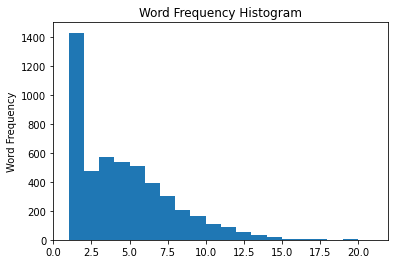

In [37]:
plt.hist(number_words, bins=20)
plt.gca().set(title='Word Frequency Histogram', ylabel='Word Frequency');